Path Finder for connected and independent q-incomplete graph partitinos

In [207]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import more_itertools

In [ ]:
n = 7

G = nx.random_graphs.binomial_graph(n, .5)
# Use the greedy_color function to color the graph
coloring = nx.coloring.greedy_color(G, strategy="largest_first")

# The chromatic number is the number of unique colors used
k = max(coloring.values()) + 2
print (k)

4


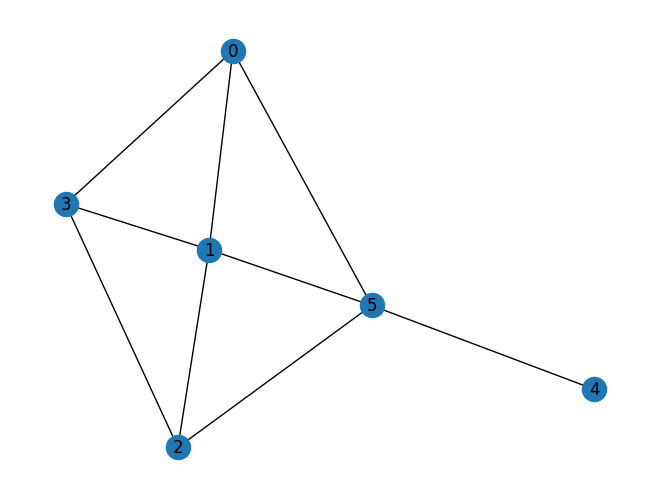

In [209]:
nx.draw(G, labels={i: i for i in G.nodes()})

In [210]:
vertices = tuple(range(n))
print (vertices)

s1 = more_itertools.set_partitions(vertices, k)
for p in s1:
    print (p)

(0, 1, 2, 3, 4, 5)
[[0], [1], [2], [3, 4, 5]]
[[0], [1], [2, 3], [4, 5]]
[[0], [1], [3], [2, 4, 5]]
[[0], [1], [2, 3, 4], [5]]
[[0], [1], [3, 4], [2, 5]]
[[0], [1], [2, 4], [3, 5]]
[[0], [1], [4], [2, 3, 5]]
[[0], [1, 2], [3], [4, 5]]
[[0], [2], [1, 3], [4, 5]]
[[0], [2], [3], [1, 4, 5]]
[[0], [1, 2], [3, 4], [5]]
[[0], [2], [1, 3, 4], [5]]
[[0], [2], [3, 4], [1, 5]]
[[0], [1, 2], [4], [3, 5]]
[[0], [2], [1, 4], [3, 5]]
[[0], [2], [4], [1, 3, 5]]
[[0], [1, 2, 3], [4], [5]]
[[0], [2, 3], [1, 4], [5]]
[[0], [2, 3], [4], [1, 5]]
[[0], [1, 3], [2, 4], [5]]
[[0], [3], [1, 2, 4], [5]]
[[0], [3], [2, 4], [1, 5]]
[[0], [1, 3], [4], [2, 5]]
[[0], [3], [1, 4], [2, 5]]
[[0], [3], [4], [1, 2, 5]]
[[0, 1], [2], [3], [4, 5]]
[[1], [0, 2], [3], [4, 5]]
[[1], [2], [0, 3], [4, 5]]
[[1], [2], [3], [0, 4, 5]]
[[0, 1], [2], [3, 4], [5]]
[[1], [0, 2], [3, 4], [5]]
[[1], [2], [0, 3, 4], [5]]
[[1], [2], [3, 4], [0, 5]]
[[0, 1], [2], [4], [3, 5]]
[[1], [0, 2], [4], [3, 5]]
[[1], [2], [0, 4], [3, 5]]
[[1], [2]

In [211]:
def is_connected(G, partition):
    for block in partition:
        if not nx.is_connected(G.subgraph(block)):
            return False
    return True

def is_q_complete(G, partition,):
    Q = nx.quotient_graph(G, partition)
    n = len(Q.nodes)
    return Q.number_of_edges() == n * (n - 1) / 2

def is_independent(G, partition):
    for block in partition:
        if not nx.is_empty(G.subgraph(block)):
            return False
    return True

In [212]:
def get_num_interior_edges(G, partition):
    return sum(G.subgraph(block).number_of_edges() for block in partition)

def get_num_exterior_edges(G, partition):
    return G.number_of_edges() - get_num_interior_edges(G, partition)

In [213]:
def render_graph(G, partition):
    
    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'black']
    color_map = [0] * G.number_of_nodes()
    # set the colors
    for i, block in enumerate(partition):
        for v in block:
            color_map[v] = colors[i]
            
    pos = nx.spring_layout(G, seed = 42)

    nx.draw(G, pos = pos, labels={i: i for i in G.nodes()}, node_color=color_map)
    plt.show()
    plt.close()

In [214]:
s1 = more_itertools.set_partitions(vertices, k)
s1 = [[set(p) for p in part] for part in s1]
# s1 = [[set(p) for p in part] for part in s1 if is_connected(G, part)]
part_props = []
for e, partition in enumerate(s1):
    
    props = dict()
    props['is_connected'] = is_connected(G, partition)
    props['is_q_complete'] = is_q_complete(G, partition)
    props['is_independent'] = is_independent(G, partition)
    print (partition, props)
    part_props.append(props)
    # render_graph(G, partition)
    

[{0}, {1}, {2}, {3, 4, 5}] {'is_connected': False, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {2, 3}, {4, 5}] {'is_connected': True, 'is_q_complete': True, 'is_independent': False}
[{0}, {1}, {3}, {2, 4, 5}] {'is_connected': True, 'is_q_complete': True, 'is_independent': False}
[{0}, {1}, {2, 3, 4}, {5}] {'is_connected': False, 'is_q_complete': True, 'is_independent': False}
[{0}, {1}, {3, 4}, {2, 5}] {'is_connected': False, 'is_q_complete': True, 'is_independent': False}
[{0}, {1}, {2, 4}, {3, 5}] {'is_connected': False, 'is_q_complete': False, 'is_independent': True}
[{0}, {1}, {4}, {2, 3, 5}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {1, 2}, {3}, {4, 5}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {2}, {1, 3}, {4, 5}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {2}, {3}, {1, 4, 5}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {1, 2

In [215]:
def can_transform_by_one_move(p1, p2):
    """
    Check if partition p1 can be transformed into p2 by moving one element.
    
    Args:
        p1: List of sets representing the first partition
        p2: List of sets representing the second partition
        
    Returns:
        bool: True if transformation is possible with one move
    """
    # Check if the number of blocks is the same
    if len(p1) != len(p2):
        return False
    
    total = 0
    
    for ba, bb in zip(p1, p2):
        
    
        # check if one block is a subset of the other (this is required)
        if not (ba.issubset(bb) or bb.issubset(ba)):
            return False
        
        # check if the symmetric difference of the two blocks is a single element
        sd = len(ba.symmetric_difference(bb))
        if  sd > 1:
            return False
        total += sd

    return total==2

# sanity check
p1 = [{0}, {1}, {2}, {3, 4, 5, 6}]
p2 = [{0}, {1}, {2, 5}, {3, 4, 6}]
print (can_transform_by_one_move(p1, p2))

True


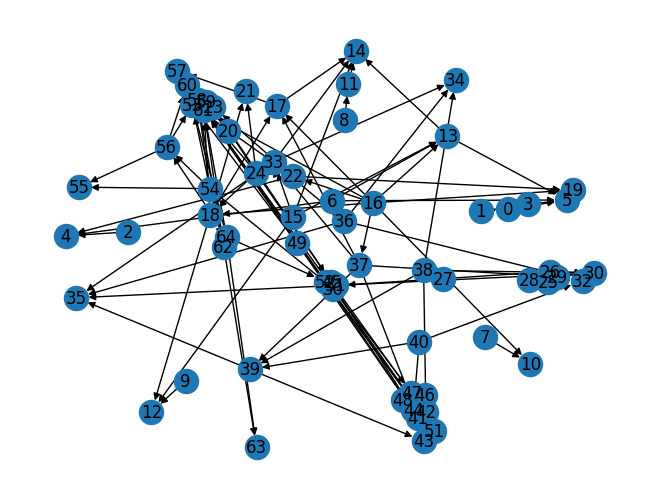

In [216]:
# let's create a graph that represents all connected partitions with an edge between them if 
# they can be transformed by one move

Gr = nx.DiGraph()
for e1, p1 in enumerate(s1):
    for e2, p2 in enumerate(s1):
        if can_transform_by_one_move(p1, p2):
            if get_num_interior_edges(G, p1) > get_num_interior_edges(G, p2):
                Gr.add_edge(e1, e2)

colors = ['gray'] * len(s1)
for i, p in enumerate(s1):
    if i in Gr:
        Gr.nodes[i]['type'] = part_props[i]['is_connected'] * 4 + part_props[i]['is_q_complete'] * 2 + part_props[i]['is_independent']
    
    
nx.draw(Gr, with_labels=True)

In [217]:
def find_path_between_types(G, start_type, end_type):
    # Find all nodes of the start and end types
    start_nodes = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == start_type]
    end_nodes = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == end_type]
    
    print ('start_nodes', start_nodes)
    print ('end_nodes', end_nodes)
    
    paths = []
    
    # Try each combination of start and end nodes
    for start_node in start_nodes:
        for end_node in end_nodes:
            try:
                # Find shortest path between these nodes
                path = nx.shortest_path(G, start_node, end_node)
                paths.append(path)
            except nx.NetworkXNoPath:
                continue
    
    return paths  


In [218]:
for i in Gr:
    print (i, Gr.nodes[i].get('type'), part_props[i]['is_connected'], part_props[i]['is_q_complete'], part_props[i]['is_independent'])

0 0 False False False
5 1 False False True
1 6 True True False
3 2 False True False
2 6 True True False
4 2 False True False
6 4 True False False
13 0 False False False
7 4 True False False
10 2 False True False
8 4 True False False
11 0 False False False
9 4 True False False
12 0 False False False
14 1 False False True
15 4 True False False
33 0 False False False
16 4 True False False
17 2 False True False
18 4 True False False
19 0 False False False
22 4 True False False
37 4 True False False
53 0 False False False
57 1 False False True
21 0 False False False
61 0 False False False
20 0 False False False
23 2 False True False
24 4 True False False
45 4 True False False
25 4 True False False
26 0 False False False
29 2 False True False
30 3 False True True
27 6 True True False
31 2 False True False
28 6 True True False
32 2 False True False
35 1 False False True
34 1 False False True
36 4 True False False
39 2 False True False
41 0 False False False
38 4 True False False
42 2 False Tr

In [219]:
path = find_path_between_types(Gr, 4, 1)

print (path)
print ()
print ('Number of paths found:', len(path))

start_nodes [6, 7, 8, 9, 15, 16, 18, 22, 37, 24, 45, 25, 36, 38, 40, 46, 48, 49, 50, 52, 54, 56, 62, 64]
end_nodes [5, 14, 57, 35, 34, 43]
[[6, 5], [6, 13, 14], [8, 11, 14], [15, 13, 5], [15, 14], [15, 33, 35], [15, 33, 34], [16, 13, 5], [16, 13, 14], [16, 17, 57], [16, 37, 33, 35], [16, 37, 33, 34], [16, 37, 39, 43], [18, 17, 14], [18, 17, 57], [22, 19, 5], [22, 23, 57], [37, 17, 14], [37, 17, 57], [37, 33, 35], [37, 33, 34], [37, 39, 43], [24, 22, 19, 5], [24, 18, 17, 14], [24, 23, 57], [24, 45, 41, 43], [45, 23, 57], [45, 41, 43], [36, 33, 14], [36, 35], [36, 34], [38, 39, 35], [38, 34], [38, 39, 43], [40, 39, 35], [40, 39, 43], [46, 42, 43], [48, 44, 43], [49, 57], [49, 41, 43], [50, 58, 57], [50, 42, 43], [52, 60, 57], [52, 44, 43], [54, 53, 57], [54, 50, 42, 43], [56, 53, 57], [62, 58, 57], [64, 60, 57], [64, 52, 44, 43]]

Number of paths found: 50


In [220]:
print ('shortest path found: ', min([len(p) for p in path]))
sp = np.argmin([len(p) for p in path])

shortest path found:  2


In [221]:
for parti in path[sp]:
    print (s1[parti], part_props[parti])

[{0}, {1}, {4}, {2, 3, 5}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {2, 4}, {3, 5}] {'is_connected': False, 'is_q_complete': False, 'is_independent': True}


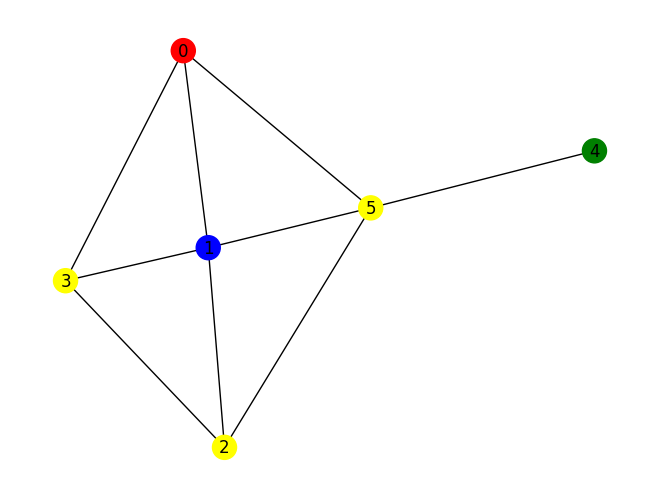

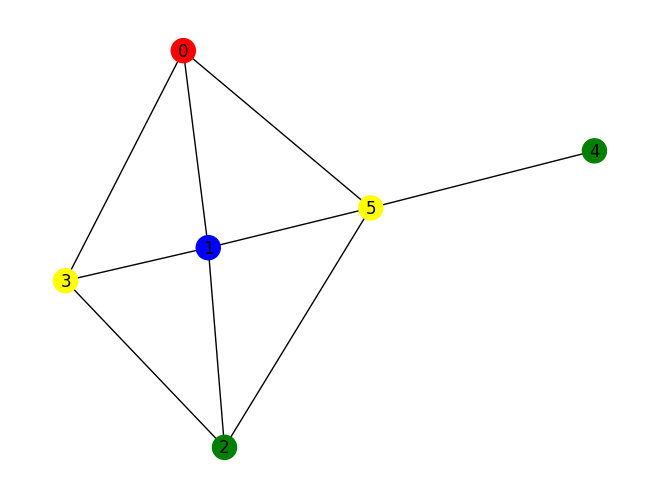

In [222]:
for i in range(len(path[sp])):
    render_graph(G, s1[path[sp][i]])